## <center>Autoencoder Exercise</center>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

### The Data

In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK.
The table shows some interesting variations across different food types, but overall differences aren't so notable. 


In [2]:
df = pd.read_csv(
    'C:/Users/Lenovo/Desktop/Python/Deep Learning/Data Sets/TensorFlow/UK_foods.csv',
    index_col='Unnamed: 0')

df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Cheese to Confectionery 
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   England    17 non-null     int64
 1   Wales      17 non-null     int64
 2   Scotland   17 non-null     int64
 3   N.Ireland  17 non-null     int64
dtypes: int64(4)
memory usage: 680.0+ bytes


**TASK: Transpose the DataFrame so that the columns are now the index.**

In [4]:
df = df.T

**TASK: Create a heatmap from the DataFrame. Does any country really stand out as different than the others? It should be tricky to tell just from the image. Do any two countries appear to be very similar?**

<AxesSubplot:>

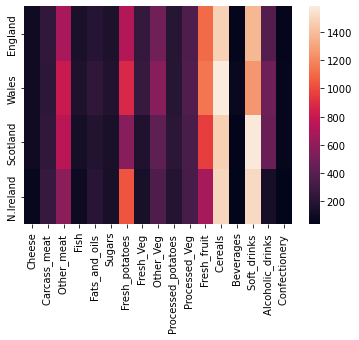

In [5]:
sns.heatmap(data=df)

**TASK: Create an encoder. Our goal will be to reduce the dimensions from 17 --> 2 and see if any countries stand out as very different. In the solutions we built one that went 17 --> 8 --> 4 --> 2**

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD 

In [7]:
encoder = Sequential()
encoder.add(Dense(units=8,activation='relu',input_shape=[17]))
encoder.add(Dense(units=4,activation='relu',input_shape=[8]))
encoder.add(Dense(units=2,activation='relu',input_shape=[4]))

**TASK: Create a decoder. In the solutions we built one that went 2-->4-->8-->17**

In [8]:
decoder = Sequential()
decoder.add(Dense(units=4,activation='relu',input_shape=[2]))
decoder.add(Dense(units=8,activation='relu',input_shape=[4]))
decoder.add(Dense(units=17,activation='relu',input_shape=[8]))

**TASK: Combine the encoder and decoder to be an autoencoder and compile the model.**

In [9]:
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer=SGD(learning_rate=1.5))

**TASK: Create a MinMaxScaler to scale the data. Make sure to transpose the data, since we really have 17 feature columns and only 4 rows (one per country).**

In [10]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [11]:
scaled_data

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

**TASK: Fit the autoencoder to the scaled data for 15 epochs.**

In [12]:
autoencoder.fit(scaled_data,scaled_data,epochs=15)

Epoch 1/15
1/1 [==============================] - 0s 322ms/step - loss: 0.4162
Epoch 2/15
1/1 [==============================] - 0s 4ms/step - loss: 0.3409
Epoch 3/15
1/1 [==============================] - 0s 2ms/step - loss: 0.3089
Epoch 4/15
1/1 [==============================] - 0s 3ms/step - loss: 0.2969
Epoch 5/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2734
Epoch 6/15
1/1 [==============================] - 0s 3ms/step - loss: 0.2609
Epoch 7/15
1/1 [==============================] - 0s 3ms/step - loss: 0.2465
Epoch 8/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2403
Epoch 9/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2374
Epoch 10/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2415
Epoch 11/15
1/1 [==============================] - 0s 3ms/step - loss: 0.2836
Epoch 12/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2536
Epoch 13/15
1/1 [==============================] - 0s 3ms/step - loss: 

**TASK: Run the scaled data through only the encoder and predict the reduced dimensionalty output. Note: You will most likely get different results than us due to random initialiations.**

In [13]:
encoder_pred = encoder.predict(scaled_data) # Dimension reduction, use only encoder
encoder_pred

1/1 [==============================] - 0s 64ms/step


array([[0.       , 1.9029281],
       [0.       , 3.04053  ],
       [0.       , 1.5185673],
       [0.       , 0.       ]], dtype=float32)

**TASK: Join the encoded 2 dimensional data with the original countries index. Triple check the index order to make sure its joined correctly. There are many ways to do this with pandas.**

In [14]:
indexes = df.index
indexes

df1 = pd.DataFrame(data=encoder_pred, index=indexes, columns=["C1", "C2"])
df1.reset_index(inplace=True)
df1.columns = ["Country", "C1", "C2"]

**TASK: Now plot out these results in a scatterplot, labeled by their respective country. You should see N. Ireland further away from the other points (but not necessarily to the left or the right, could be centered further away from the others).**

<AxesSubplot:xlabel='C1', ylabel='C2'>

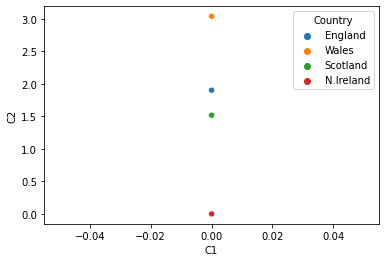

In [15]:
sns.scatterplot(x='C1',y='C2',data=df1,hue='Country')

 Once we go back and look at the data in the table, this makes sense: the Northern Irish eat way more grams of fresh potatoes and way fewer of fresh fruits, cheese, fish and alcoholic drinks. It's a good sign that structure we've visualized reflects a big fact of real-world geography: Northern Ireland is the only of the four countries not on the island of Great Britain. (If you're confused about the differences among England, the UK and Great Britain, see: this [video](https://www.youtube.com/watch?v=rNu8XDBSn10).)